In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) 

lista_arquivos = ['../Data/2022.csv', '../Data/2023.csv', '../Data/2024.csv']

dataframes = []

for nome_do_arquivo in lista_arquivos:
    try:
        df_temp = pd.read_csv(nome_do_arquivo, encoding='latin-1', sep=';')
        dataframes.append(df_temp)
        
    except FileNotFoundError:
        print(f"ERRO: Arquivo '{nome_do_arquivo}' não encontrado. Verifique o caminho.")
    except Exception as e:
        print(f"ERRO ao ler o arquivo '{nome_do_arquivo}': {e}.")

if dataframes:
    df_final = pd.concat(dataframes, ignore_index=True)
    print(f"Total de registros consolidados: {len(df_final)}")
else:
    df_final = None
    print("\nNão foi possível carregar os dados.")

if df_final is not None:
    
    try:
        df_final['QUANTIDADE'] = pd.to_numeric(df_final['QUANTIDADE'], errors='coerce')
        
        df_final['MES'] = pd.to_datetime(df_final['MES'], format='%Y-%m', errors='coerce')
        
        df_final.dropna(subset=['QUANTIDADE', 'MES'], inplace=True)
        
        print(f"Total de registros após limpeza: {len(df_final)}")
        
    except Exception as e:
        print(f"Erro no tratamento de dados: {e}")
        
    display(df_final.head())

Total de registros consolidados: 495342
Total de registros após limpeza: 494301


,LOJA,CODIGO,PRODUTO,DEPARTAMENTO,QUANTIDADE,MES
0,5,444286,BALOES METALLIC TAM 9 CHUMBO C/25 SAO ROQUE,FESTA,1.0,2022-11-01
1,4,544788,BORBOLETA OURO C/1 UN,PRODUTOS DE EPOCAS,1.0,2022-11-01
2,5,578493,COBERTURA P/BOLO CHOCOLATE POUCH 255G ALISPEC,CONFEITARIA,6.0,2022-11-01
3,4,578493,COBERTURA P/BOLO CHOCOLATE POUCH 255G ALISPEC,CONFEITARIA,2.0,2022-11-01
4,5,529181,FILM EMB.ALM REFIL 38 CM X 300 M ART LINE,FESTA,1.0,2022-11-01


/tmp/ipykernel_9507/2767102766.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_produtos.values, y=top_produtos.index, palette='viridis')
/home/iago/Projeto-Mantova/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


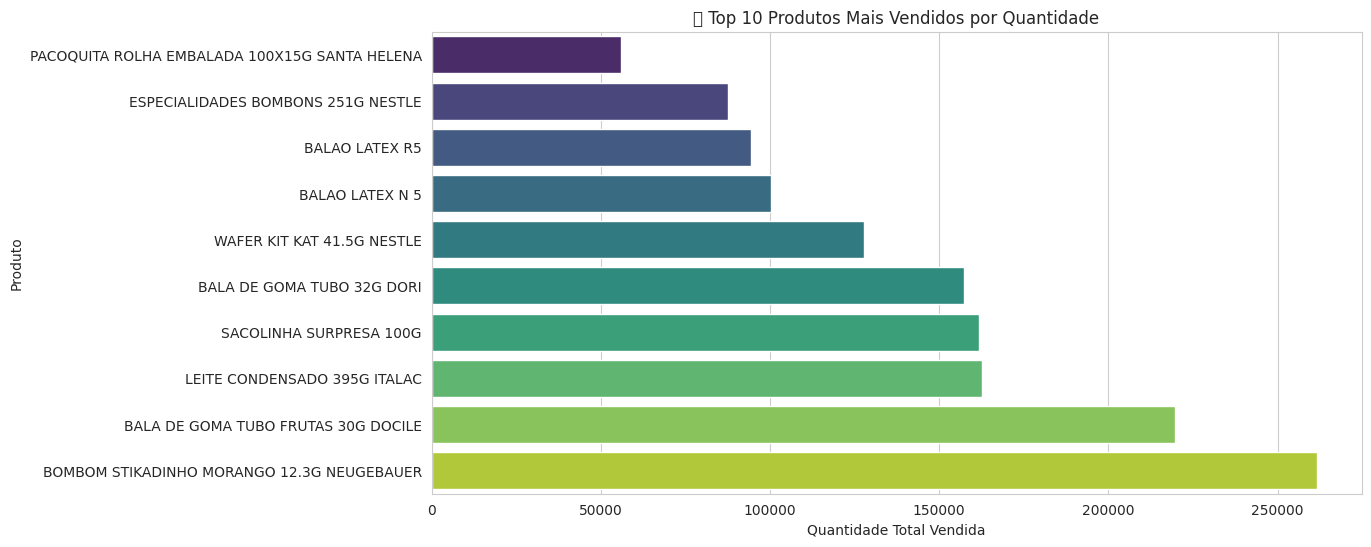

/tmp/ipykernel_9507/2767102766.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_lojas.values, y=top_lojas.index.astype(str), palette='magma')
/home/iago/Projeto-Mantova/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


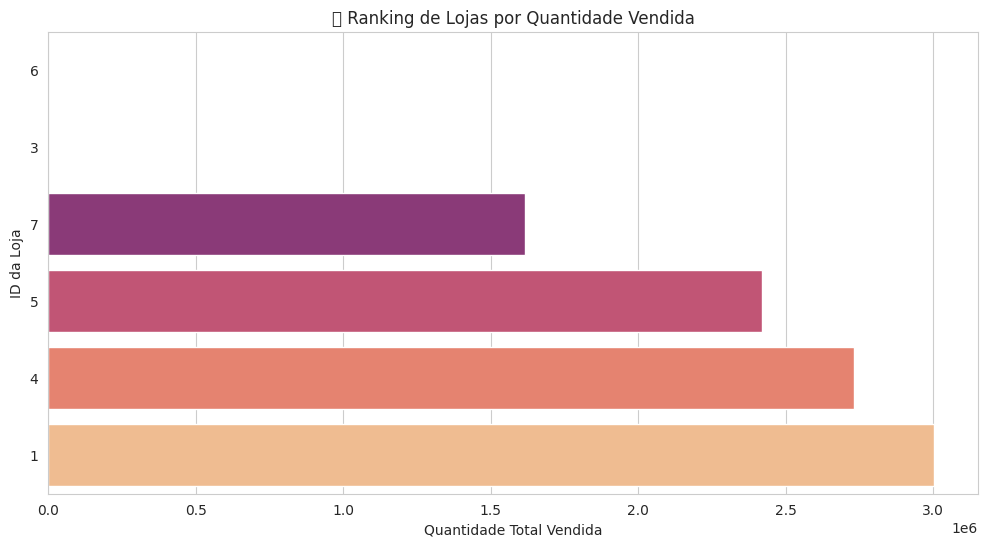

/tmp/ipykernel_9507/2767102766.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_departamento.values, y=performance_departamento.index, palette='crest')


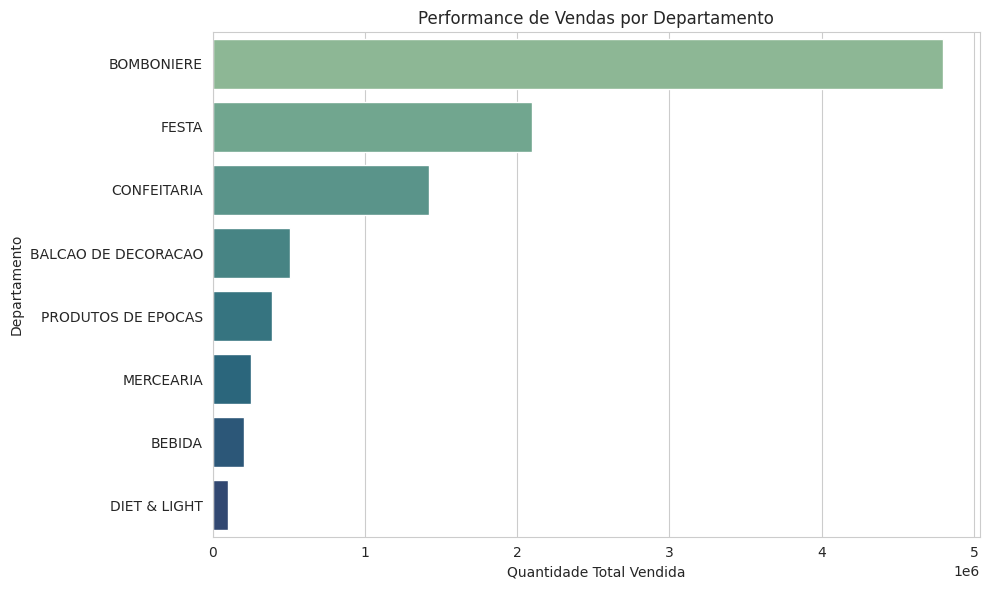

In [17]:
top_produtos = df_final.groupby('PRODUTO')['QUANTIDADE'].sum().nlargest(10).sort_values(ascending=True)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_produtos.values, y=top_produtos.index, palette='viridis')
plt.title('🏆 Top 10 Produtos Mais Vendidos por Quantidade')
plt.xlabel('Quantidade Total Vendida')
plt.ylabel('Produto')
plt.show()

top_lojas = df_final.groupby('LOJA')['QUANTIDADE'].sum().nlargest(10).sort_values(ascending=True)

plt.figure(figsize=(12, 6))
# Converte 'LOJA' (que pode ser um número) para string para o eixo Y
sns.barplot(x=top_lojas.values, y=top_lojas.index.astype(str), palette='magma') 
plt.title('⭐ Ranking de Lojas por Quantidade Vendida')
plt.xlabel('Quantidade Total Vendida')
plt.ylabel('ID da Loja')
plt.show()

performance_departamento = df_final.groupby('DEPARTAMENTO')['QUANTIDADE'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=performance_departamento.values, y=performance_departamento.index, palette='crest')
plt.title('Performance de Vendas por Departamento')
plt.xlabel('Quantidade Total Vendida')
plt.ylabel('Departamento')
plt.tight_layout()
plt.show()

/tmp/ipykernel_9507/1651595743.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diversidade_produtos.values, y=diversidade_produtos.index, palette='Blues_d')


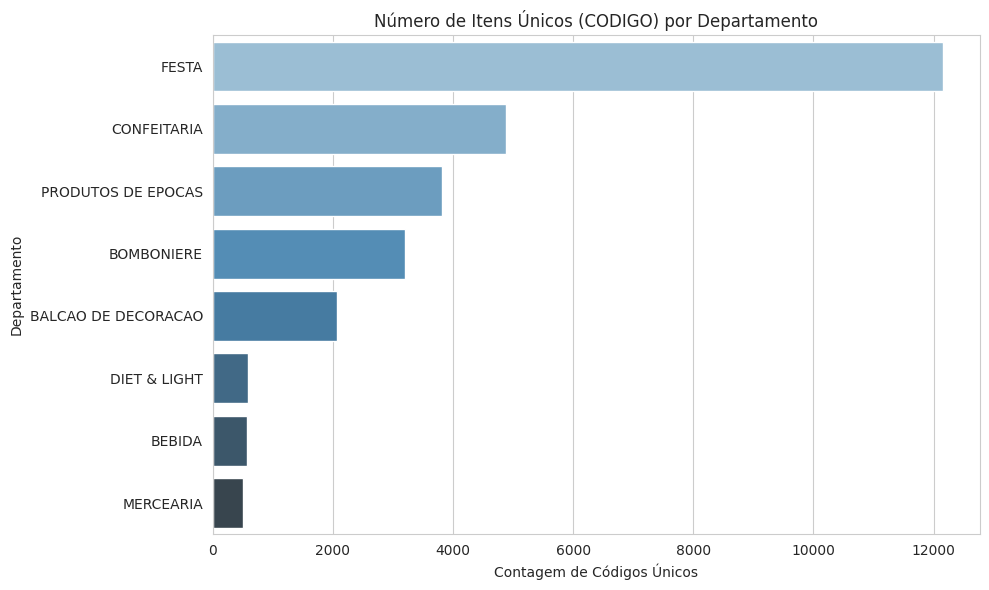

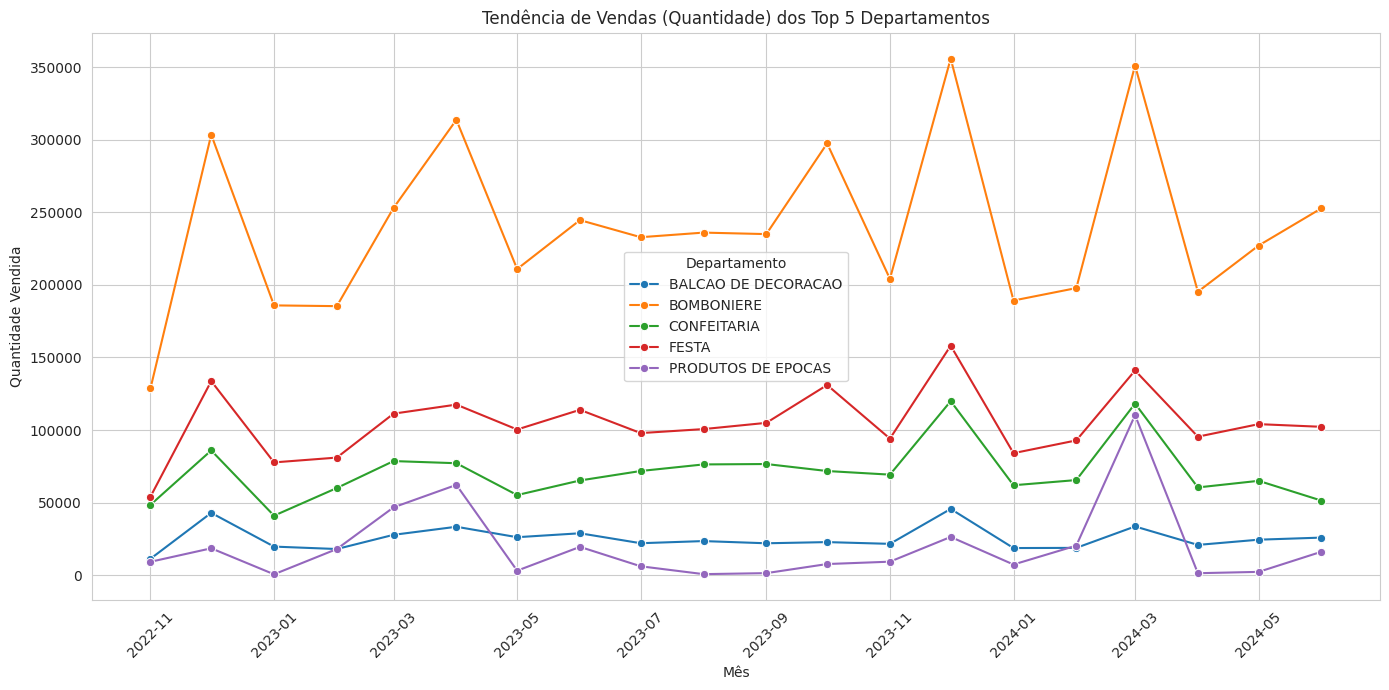

In [18]:
diversidade_produtos = df_final.groupby('DEPARTAMENTO')['CODIGO'].nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=diversidade_produtos.values, y=diversidade_produtos.index, palette='Blues_d')
plt.title('Número de Itens Únicos (CODIGO) por Departamento')
plt.xlabel('Contagem de Códigos Únicos')
plt.ylabel('Departamento')
plt.tight_layout()
plt.show()

top_5_deps = df_final.groupby('DEPARTAMENTO')['QUANTIDADE'].sum().nlargest(5).index
df_top_deps = df_final[df_final['DEPARTAMENTO'].isin(top_5_deps)]

vendas_deps_tempo = df_top_deps.groupby(['MES', 'DEPARTAMENTO'])['QUANTIDADE'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=vendas_deps_tempo, 
    x='MES', 
    y='QUANTIDADE', 
    hue='DEPARTAMENTO', 
    marker='o'
)
plt.title('Tendência de Vendas (Quantidade) dos Top 5 Departamentos')
plt.xlabel('Mês')
plt.ylabel('Quantidade Vendida')
plt.legend(title='Departamento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_9507/1251125851.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


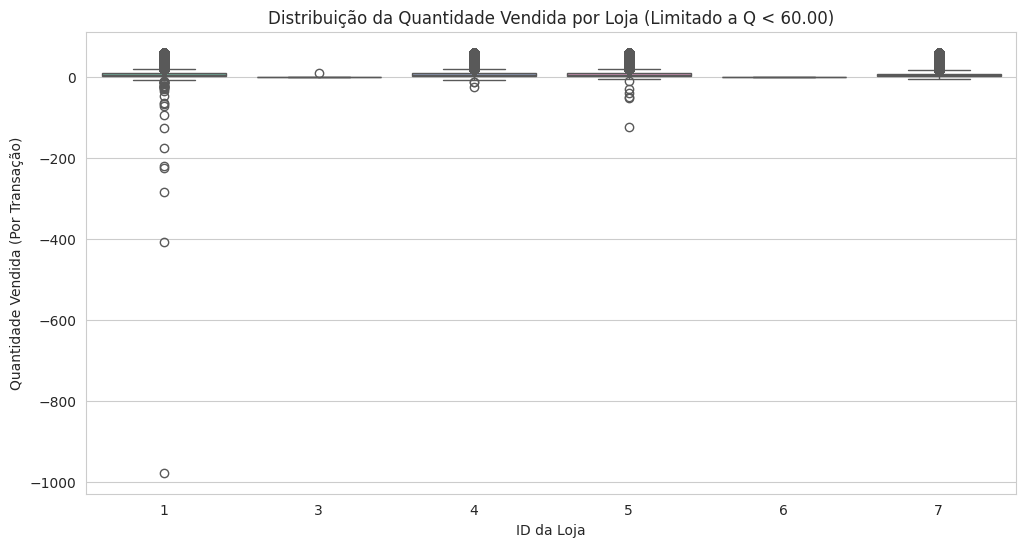

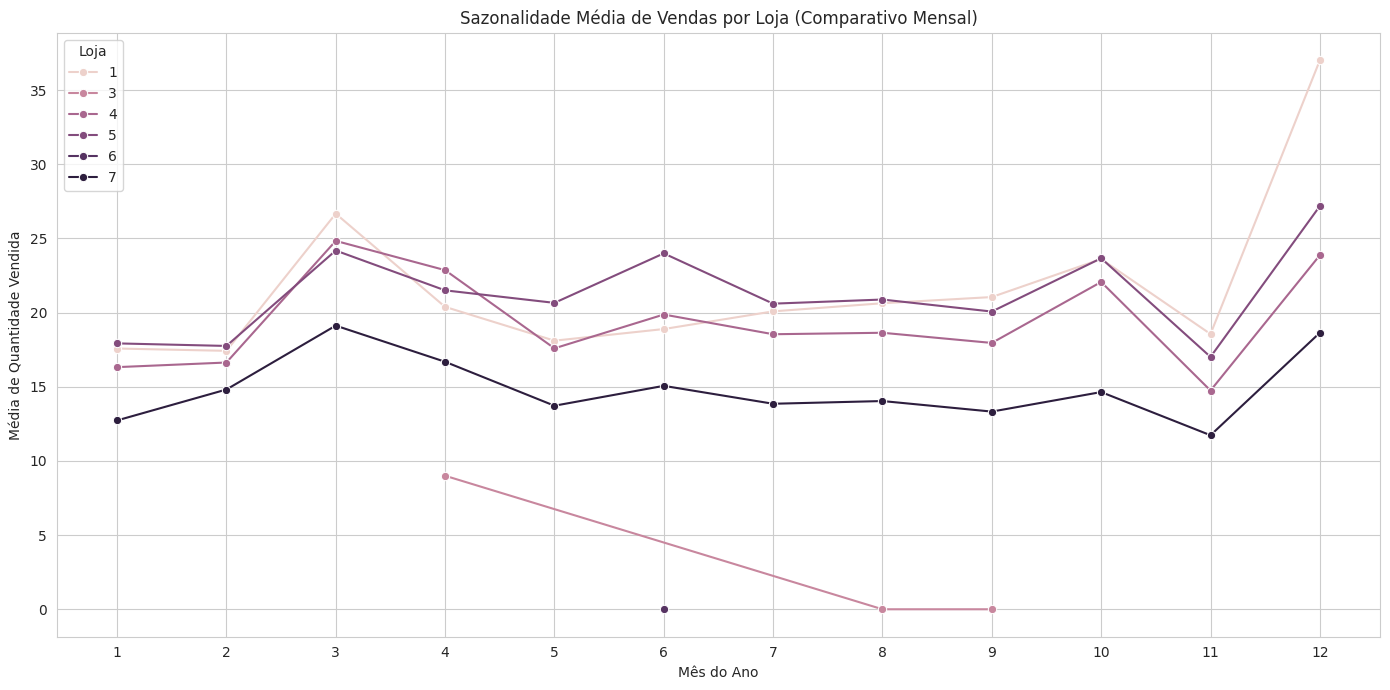

In [19]:
plt.figure(figsize=(12, 6))

q_limite = df_final['QUANTIDADE'].quantile(0.95)

sns.boxplot(
    data=df_final[df_final['QUANTIDADE'] < q_limite], 
    x='LOJA', 
    y='QUANTIDADE', 
    palette='Set2'
)
plt.title(f'Distribuição da Quantidade Vendida por Loja (Limitado a Q < {q_limite:.2f})')
plt.xlabel('ID da Loja')
plt.ylabel('Quantidade Vendida (Por Transação)')
plt.show()

print("\n" + "="*50 + "\n")

df_final['MES_NUM'] = df_final['MES'].dt.month 

vendas_mensais_loja = df_final.groupby(['MES_NUM', 'LOJA'])['QUANTIDADE'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=vendas_mensais_loja, 
    x='MES_NUM', 
    y='QUANTIDADE', 
    hue='LOJA', 
    marker='o'
)
plt.title('Sazonalidade Média de Vendas por Loja (Comparativo Mensal)')
plt.xlabel('Mês do Ano')
plt.ylabel('Média de Quantidade Vendida')
plt.legend(title='Loja')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


/tmp/ipykernel_9507/28620180.py:18: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/iago/Projeto-Mantova/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


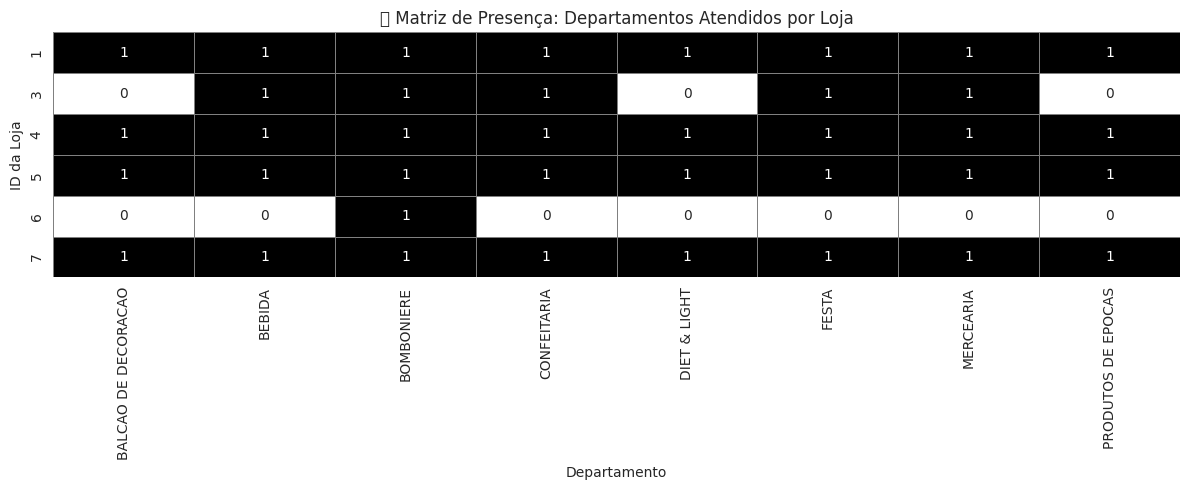


Contagem de Departamentos Atendidos (Diversidade de Sortimento por Loja):


,Departamentos Atendidos
LOJA,
1,8
4,8
7,8
5,8
3,5
6,1


In [20]:

tabela_cruzada = pd.crosstab(df_final['LOJA'], df_final['DEPARTAMENTO'])

matriz_presenca = (tabela_cruzada > 0).astype(int)

plt.figure(figsize=(12, len(matriz_presenca) * 0.5 + 2)) # Tamanho ajustável
sns.heatmap(
    matriz_presenca, 
    annot=True, 
    fmt="d", 
    cmap="binary", 
    cbar=False, 
    linewidths=.5, 
    linecolor='gray'
)
plt.title('✅ Matriz de Presença: Departamentos Atendidos por Loja')
plt.xlabel('Departamento')
plt.ylabel('ID da Loja')
plt.tight_layout()
plt.show()

contagem_deps_por_loja = matriz_presenca.sum(axis=1).sort_values(ascending=False)
print("\nContagem de Departamentos Atendidos (Diversidade de Sortimento por Loja):")
display(contagem_deps_por_loja.to_frame(name='Departamentos Atendidos'))
